<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

### Task 1

Read and display "mall_customers.csv"

In [2]:
import pandas as pd
data = pd.read_csv('mall_customers.csv')
# print(data)
data.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

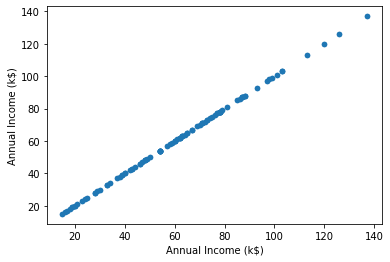

In [27]:
ax = data.plot.scatter(x='Annual Income (k$)',y='Annual Income (k$)')

### Task 2

Perform Exploratory Data Analytics and mention atleast 2 inferences from the visualizations

There is direct realtion in spending score and annual score in between 40 to 60
the annual income 40 to 70 have the spend score in between 40 to 60 


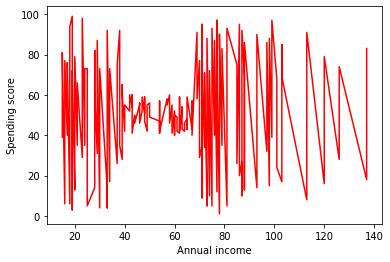

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
# Annual score V/s spending score
data_sorted=data.sort_values("Annual Income (k$)",ascending=True)
data.head()
fig,axes=plt.subplots()
axes.plot(data_sorted["Annual Income (k$)"],data_sorted["Spending Score (1-100)"],"r")  
axes.set_xlabel('Annual income')
axes.set_ylabel("Spending score")
print("""There is direct realtion in spending score and annual score in between 40 to 60
the annual income 40 to 70 have the spend score in between 40 to 60 """)
                   

As we see the age increses the spending ratio decreases
so spending ratio high for less than 40 years.


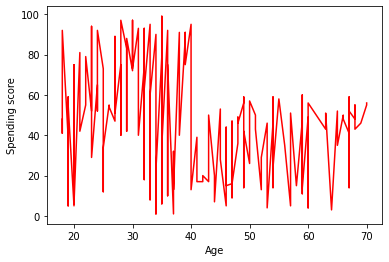

In [4]:
datasor = data.sort_values('Age',ascending=True)
fig,axes=plt.subplots()
axes.plot(datasor["Age"],datasor["Spending Score (1-100)"],"r")  
axes.set_xlabel('Age')
axes.set_ylabel("Spending score")
print('''As we see the age increses the spending ratio decreases
so spending ratio high for less than 40 years.''')

### Task 3

Plot the Elbow Plot in  order to implement K-Means Clustering and write the value of selected K

In [5]:
Gender = pd.get_dummies(data['Gender'],drop_first=True) # creating string data to binary data representing the gender in binary form
Gender.head()
data.drop(['Gender'],axis=1,inplace=True) #removing the gender col, from data set we have already created for gender add this
data = pd.concat([data,Gender],axis=1)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [6]:
data.keys()


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Male'],
      dtype='object')

Text(0.5, 1.0, 'Elbow Plot')

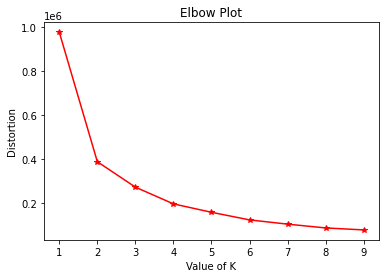

In [7]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)   # as we want to try the K values from 1 to 9
for k in K:
    kmeanModel = KMeans(n_clusters=k)   # initializing KMeans
    kmeanModel.fit(data)                   # clustering
    distortions.append(kmeanModel.inertia_)   # Inertia is the sum of squared error for each cluster
plt.plot(K, distortions, 'r*-')
plt.xlabel('Value of K')
plt.ylabel('Distortion')
plt.title('Elbow Plot')

### Task 4

With selected K value, perform K-Means Clustering to cluster the customers

In [8]:
# numbers of cluster set to 4 as above fig
km = KMeans(n_clusters = 4, random_state=101)
km.fit(data)
clusters = km.labels_
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

### Task 5

Add the predicted cluster labels to the main dataframe as a new column and display the complete dataframe

In [46]:
data['Clusters'] = clusters
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Clusters
0,1,19,15,39,1,2
1,2,21,15,81,1,2
2,3,20,16,6,0,2
3,4,23,16,77,0,2
4,5,31,17,40,0,2


### Task 6

Create a scatter plot (Annual Income  vs Spending Score) and colour code the scatter plot as per the clustered customers<br>
**HINT :** df.plot.scatter

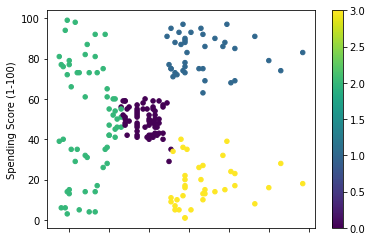

In [47]:

ax2 = data.plot.scatter(x='Annual Income (k$)',
                      y='Spending Score (1-100)',
                      c=data['Clusters'],
                      colormap='viridis')


### Task 7

Answer the following questions as per the scatter plot created above and as per your understanding of the topics:-<br>
Write the colour codes or cluster number from the above scatter plot in your answer

a) If you were a bank, who would you target for loan purpose?

b) If you were a bank which customers would you target to increase your revenue? 

c) If you're an e-commerce website which customers are ideal for you? 

###### a - I offer yellow one because they have high income but low spending score, in this way i they are not bad debitor
###### b - by giving the loan and credit card to purple one for increaing the revenue becoz they do not spend so much lack of money.
###### c - Blue (light purple)  is ideal customer. they spend a lot of money and they have good earning as well.